In [1]:
# This file is a draft exploratory data analysis file to test pushing to the capstone repo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('bmh')


In [ ]:
# import our data

df = pd.read_csv("https://www.dropbox.com/s/r1f53o4d4xtjudp/SHR76_20.csv?dl=1")

In [8]:
# take a look

df.describe(include = "all")

# not super useful, going to actually need to do some exploratory work

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
count,827219,827219,827219,827219,827219,827219,827219,827219,827219.000000,22468,...,827219,827219,827219,827219,827219,32451,827219.000000,827219.000000,824709.000000,827219
unique,789664,3065,13037,52,9687,8,2,2,NaN,51,...,6,3,17,29,32,7,NaN,NaN,NaN,409
top,197702001NY05904,"Los Angeles, CA",NY03030,California,New York,Municipal police,FBI,Yes,NaN,FLA,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,Felon killed in commission of a crime,NaN,NaN,NaN,"New York-New Jersey-Long Island, NY-NJ"
freq,13,53346,46455,122841,46455,641556,793855,583230,NaN,2769,...,282314,593227,404196,320712,220836,11346,NaN,NaN,NaN,63174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.991040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.128523,0.185658,52603.878351,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.008957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.564474,0.596206,32519.244970,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,10181.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,30180.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40605.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,82306.000000,NaN


In [9]:
df.info()

# it looks like we're missing a lot of StateNames and Subcircum values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827219 entries, 0 to 827218
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            827219 non-null  object 
 1   CNTYFIPS      827219 non-null  object 
 2   Ori           827219 non-null  object 
 3   State         827219 non-null  object 
 4   Agency        827219 non-null  object 
 5   Agentype      827219 non-null  object 
 6   Source        827219 non-null  object 
 7   Solved        827219 non-null  object 
 8   Year          827219 non-null  int64  
 9   StateName     22468 non-null   object 
 10  Month         827219 non-null  object 
 11  Incident      827219 non-null  int64  
 12  ActionType    827219 non-null  object 
 13  Homicide      827219 non-null  object 
 14  Situation     827219 non-null  object 
 15  VicAge        827219 non-null  int64  
 16  VicSex        827219 non-null  object 
 17  VicRace       827219 non-null  object 
 18  VicE

In [16]:
# let's take a look at the State variable

df['StateName'].value_counts(dropna =False).sort_index()  

# ok, so it's a little bit of a mess, but the documentation might be helpful for explaining some entries like "FEDERA"


ALABAM        24
ALASKA        56
ARIZON       523
ARKANS       340
CALIFO      2379
COLORA       349
CONNEC       161
DELAWA        79
DISTRI       216
FEDERA         4
FLA         2769
FLORID         1
GEORGI       606
HAWAII        42
IDAHO         49
ILLINO      1072
INDIAN       546
IOWA         124
KANSAS        95
KENTUC       366
LOUISI       734
MAINE         29
MARYLA       513
MASSAC       167
MICHIG       848
MINNES       230
MISSIS       237
MISSOU       619
MONTAN        69
NEBRAS        67
NEVADA       206
NEW HA        24
NEW JE       336
NEW ME       154
NEW YO       820
NORTH        846
OHIO         787
OKLAHO       363
OREGON       173
PENNSY       272
RHODE         32
SOUTH        640
TENNES       747
TEXAS       2140
UTAH         112
VERMON        18
VIRGIN       584
WASHIN       337
WEST V       120
WISCON       423
WYOMIN        20
NaN       804751
Name: StateName, dtype: int64

In [19]:
# now, let's look at Subcircum, which I'm guessing is a sub-category to circumstance


df.groupby("Circumstance")['Subcircum'].value_counts(dropna =False).sort_index()  


# not that big of a deal to not have this. We could potentially re-code some of the circumstances to capture specific instances 
# of the sub-circumstances

Circumstance                          Subcircum                            
Abortion                              NaN                                          14
All other manslaughter by negligence  NaN                                        7341
All suspected felony type             NaN                                       13686
Argument over money or property       NaN                                       15882
Arson                                 NaN                                        4855
Brawl due to influence of alcohol     NaN                                       16307
Brawl due to influence of narcotics   NaN                                        5237
Burglary                              NaN                                        6652
Child killed by babysitter            NaN                                        1334
Children playing with gun             NaN                                        1524
Circumstances undetermined            Not enough information to 

<AxesSubplot:xlabel='Year', ylabel='count'>

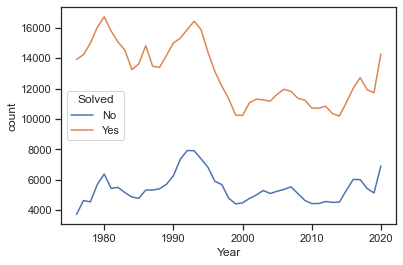

In [41]:
# lets take a look at our year variable

df_solved  = df.groupby("Year")['Solved'].value_counts(dropna =True).sort_index().reset_index(name="count")  
 
# Setting the Date as index (optional)

# df_solved = df_solved.set_index("Year")

# set a viz theme
sns.set_theme(style="ticks")

# plot cases by year
sns.lineplot(x="Year", y="count",
             hue="Solved", 
             data=df_solved)

